In [1]:
import numpy as np
import pandas as pd

In [11]:
churn = pd.read_csv('churn_data.csv')
customer = pd.read_csv('customer_data.csv')
internet = pd.read_csv('internet_data.csv')

In [12]:
df= pd.merge(churn, customer, how = 'inner', on = 'customerID' )

In [13]:
telecom = pd.merge(df, internet, how = 'inner', on = 'customerID')

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [16]:
#DATA PREPERATION

In [17]:
churn.head()
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [18]:
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1, 'No':0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes':1, 'No':0})

In [19]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [20]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [21]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [22]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [23]:

np.mean(telecom.TotalCharges[telecom['TotalCharges'] != ' '].astype(float))


2283.3004408418697

In [24]:
telecom.loc[telecom['TotalCharges'] == ' ','TotalCharges'] = 2283.300

telecom['TotalCharges'] = telecom.TotalCharges.astype(float)


In [25]:
telecom_cont = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [26]:
telecom_cont.describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2283.300440
std,24.559481,30.090047,0.368612,2265.000258
min,0.000000,18.250000,0.000000,18.800000
1%,1.000000,19.200000,0.000000,19.900000
5%,1.000000,19.650000,0.000000,49.650000
10%,2.000000,20.050000,0.000000,84.610000
25%,9.000000,35.500000,0.000000,402.225000
50%,29.000000,70.350000,0.000000,1400.550000
75%,55.000000,89.850000,0.000000,3786.600000


In [27]:
norm_df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [28]:
norm_df = (norm_df-np.mean(norm_df))/norm_df.std()

In [29]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)

In [30]:
telecom = pd.concat([telecom,norm_df],axis=1)

In [31]:
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.277354,-1.160241,-0.994901
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.066323,-0.259611,-0.173863
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,-0.362635,-0.960331
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.514215,-0.746482,-0.195386
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,0.197351,-0.941126


In [32]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   Churn                                  7043 non-null   int64  
 4   SeniorCitizen                          7043 non-null   int64  
 5   Partner                                7043 non-null   int64  
 6   Dependents                             7043 non-null   int64  
 7   Contract_One year                      7043 non-null   uint8  
 8   Contract_Two year                      7043 non-null   uint8  
 9   PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 10  PaymentMethod_Electronic check         7043 non-null   uint8  
 11  Paym

In [34]:
telecom['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [41]:
churn_rate = (sum(telecom.Churn.astype(int))/len(telecom.Churn)*100)
churn_rate

26.536987079369588

In [43]:
non_churn_rate = 100-churn_rate
non_churn_rate

73.4630129206304

In [44]:
from sklearn.model_selection import train_test_split

In [56]:
X = telecom.drop(['Churn','customerID'],axis=1)
y = telecom['Churn']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
import statsmodels.api as sm

In [59]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.6
Date:                Sun, 04 Apr 2021   Deviance:                       4017.3
Time:                        20:10:57   Pearson chi2:                 5.71e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5571      1.182     -2.163      0.031      -4.874      -0.240
PhoneService                              0.4628      0.587      0.789      0.430      -0.687       1.613
PaperlessBilling                          0.3445      0.090      3.820      0.000       0.168       0.521
SeniorCitizen                             0.2943      0.103      2.870      0.004       0.093       0.495
Partner                                   0.0259      0.094      0.275      0.783      -0.158       0.210
Dependents                               -0.2234      0.108     -2.075      0.038      -0.434      -0.012
Contract_One year                        -0.6766      0.129     -5.232      0.000      -0.930      -0.423
Contract_Two year                        -1.3507      0.207     -6.518      0.000      -1.757      -0.945
PaymentMethod_Credit card (automatic)    -0.1523      0.138     -1.102      0.270      -0.423       0.119
PaymentMethod_Electronic check            0.2744      0.114      2.405      0.016       0.051       0.498
PaymentMethod_Mailed check               -0.0881      0.139     -0.636      0.525      -0.360       0.184
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.113
MultipleLines_No                         -0.0461      0.204     -0.227      0.821      -0.445       0.353
MultipleLines_Yes                         0.5089      0.392      1.298      0.194      -0.260       1.277
InternetService_Fiber optic               2.0272      0.967      2.096      0.036       0.132       3.922
InternetService_No                       -2.6205      1.319     -1.986      0.047      -5.207      -0.034
OnlineSecurity_No                         0.0527      0.058      0.906      0.365      -0.061       0.167
OnlineSecurity_Yes                        0.0107      0.174      0.061      0.951      -0.330       0.352
OnlineBackup_No                           0.0410      0.054      0.758      0.449      -0.065       0.147
OnlineBackup_Yes                          0.0223      0.172      0.130      0.897      -0.315       0.360
DeviceProtection_No                      -0.0699      0.056     -1.256      0.209      -0.179       0.039
DeviceProtection_Yes                      0.1332      0.173      0.771      0.441      -0.206       0.472
TechSupport_No                            0.1575      0.059      2.655      0.008       0.041       0.274
TechSupport_Yes                          -0.0942      0.175     -0.538      0.591      -0.437       0.249
StreamingTV_No                           -0.3196      0.133     -2.405      0.016      -0.580      -0.059
StreamingTV_Yes                           0.3830      0.267      1.434      0.152      -0.140       0.906
Streaming

In [62]:
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

<AxesSubplot:>

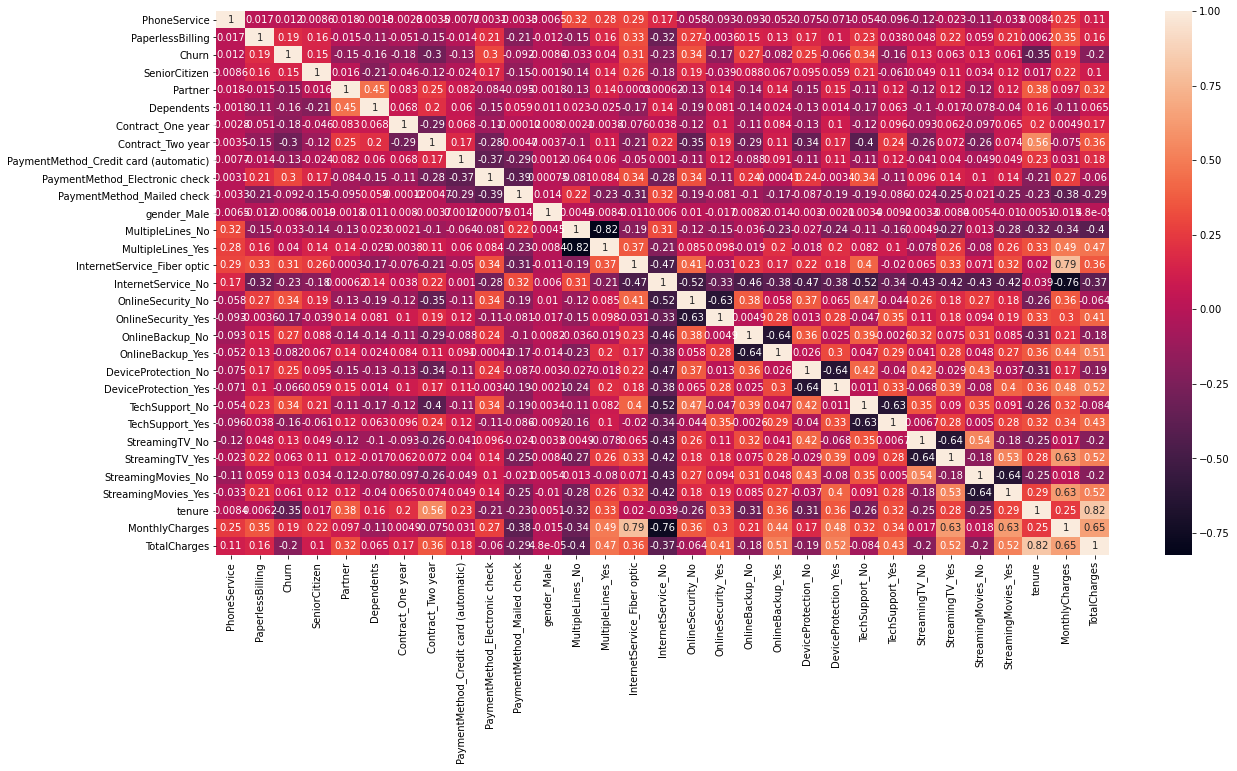

In [64]:
plt.figure(figsize = (20,10))
sbn.heatmap(telecom.corr(), annot = True)

In [65]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

<AxesSubplot:>

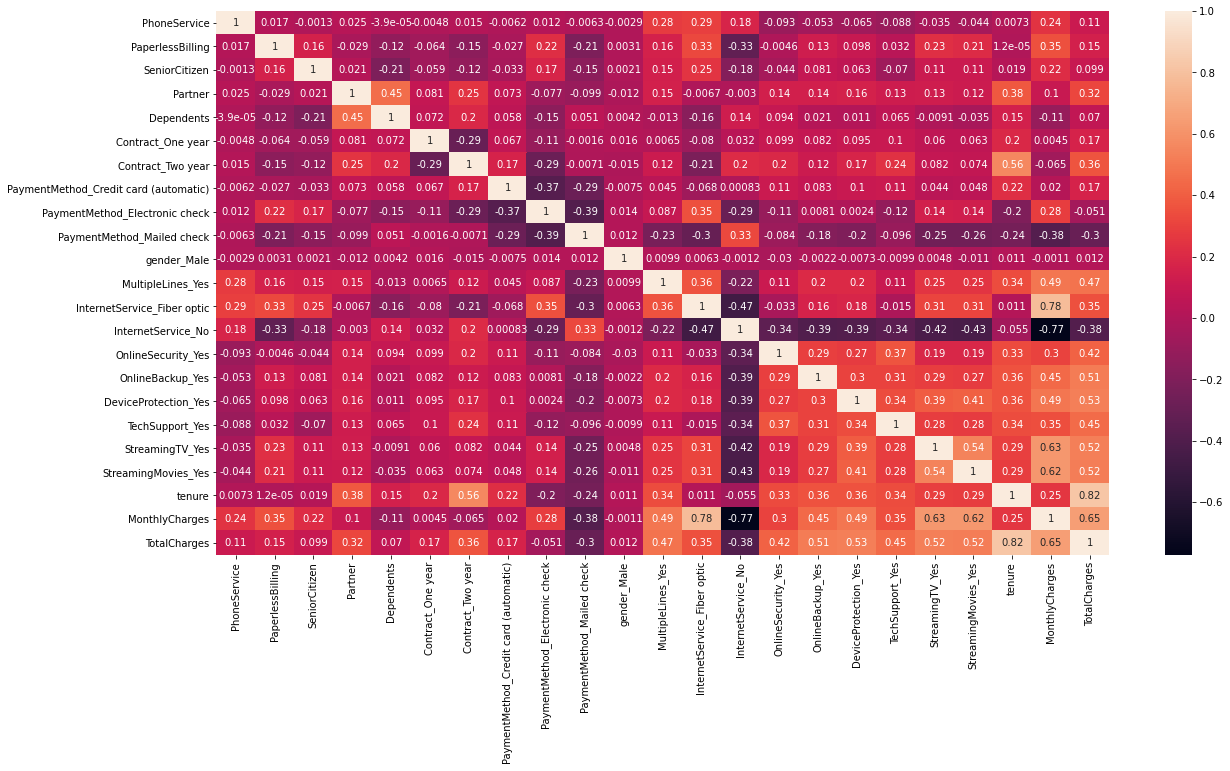

In [68]:
plt.figure(figsize = (20,10))
sbn.heatmap(X_train2.corr(), annot = True)

In [72]:
logm2 = sm.GLM(y_train, (sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.6
Date:                Mon, 05 Apr 2021   Deviance:                       4017.3
Time:                        00:22:16   Pearson chi2:                 5.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.0001      1.540     -1.949      0.051      -6.018       0.018
PhoneService                              0.4167      0.786      0.530      0.596      -1.124       1.957
PaperlessBilling                          0.3445      0.090      3.820      0.000       0.168       0.521
SeniorCitizen                             0.2943      0.103      2.870      0.004       0.093       0.495
Partner                                   0.0259      0.094      0.275      0.783      -0.158       0.210
Dependents                               -0.2234      0.108     -2.075      0.038      -0.434      -0.012
Contract_One year                        -0.6766      0.129     -5.232      0.000      -0.930      -0.423
Contract_Two year                        -1.3507      0.207     -6.518      0.000      -1.757      -0.945
PaymentMethod_Credit card (automatic)    -0.1523      0.138     -1.102      0.270      -0.423       0.119
PaymentMethod_Electronic check            0.2744      0.114      2.405      0.016       0.051       0.498
PaymentMethod_Mailed check               -0.0881      0.139     -0.636      0.525      -0.360       0.184
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.113
MultipleLines_Yes                         0.5551      0.215      2.583      0.010       0.134       0.976
InternetService_Fiber optic               2.0272      0.967      2.096      0.036       0.132       3.922
InternetService_No                       -2.1775      0.977     -2.228      0.026      -4.093      -0.262
OnlineSecurity_Yes                       -0.0420      0.217     -0.194      0.846      -0.466       0.382
OnlineBackup_Yes                         -0.0187      0.211     -0.089      0.929      -0.433       0.396
DeviceProtection_Yes                      0.2031      0.213      0.952      0.341      -0.215       0.621
TechSupport_Yes                          -0.2517      0.219     -1.149      0.250      -0.681       0.177
StreamingTV_Yes                           0.7026      0.397      1.770      0.077      -0.075       1.480
StreamingMovies_Yes                       0.6728      0.396      1.698      0.089      -0.104       1.449
tenure                                   -1.2987      0.173     -7.488      0.000      -1.639      -0.959
MonthlyCharges                           -1.5224      1.158     -1.314      0.189      -3.793       0.748
TotalCharges                              0.5634      0.185      3.042      0.002       0.200       0.926
=========================================================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,13)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\mirza.mohammedhashim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 15  9 10  2  8 14
  1 13  1  1  1  1]


In [105]:
col = X.columns[rfe.support_]

X_train3 = X_train[col]
X_train3

,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_No,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,StreamingTV_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
877,0,1,0,0,0,0,0,0,1,1,0.758520,-0.153263,0.350419
5792,1,0,0,0,1,1,0,0,0,1,-0.707309,1.048131,-0.378168
5334,1,0,1,0,0,1,0,1,1,1,0.677085,1.435302,1.328874
878,0,1,0,1,0,0,0,0,0,0,1.124977,-0.000389,0.775364
6578,0,1,0,0,0,0,0,0,0,1,-0.910897,0.292067,-0.701987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1,1,0,0,0,0,1,0,0,0,0.514215,-1.291513,-0.470949
3927,1,0,0,0,1,0,1,0,0,0,-1.195919,-1.469313,-0.985497
5955,0,0,1,0,1,0,0,0,1,0,1.613587,0.120914,1.135563
6936,1,0,0,1,0,1,0,1,0,0,-1.114484,0.511409,-0.838102


In [106]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train3, y_train)

LogisticRegression()

In [107]:
logm3 = sm.GLM(y_train, sm.add_constant(X_train3), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.5
Date:                Mon, 05 Apr 2021   Deviance:                       4056.9
Time:                        01:05:26   Pearson chi2:                 5.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.2285      0.160    -13.904      0.000      -2.543      -1.914
PaperlessBilling                   0.3649      0.089      4.081      0.000       0.190       0.540
Contract_One year                 -0.7719      0.127     -6.075      0.000      -1.021      -0.523
Contract_Two year                 -1.5272      0.204     -7.491      0.000      -1.927      -1.128
PaymentMethod_Electronic check     0.3850      0.083      4.643      0.000       0.222       0.547
MultipleLines_No                  -0.3902      0.087     -4.489      0.000      -0.561      -0.220
InternetService_Fiber optic        1.5899      0.206      7.726      0.000       1.187       1.993
InternetService_No                -1.1251      0.231     -4.866      0.000      -1.578      -0.672
OnlineSecurity_No                  0.2116      0.106      2.003      0.045       0.005       0.419
StreamingTV_Yes                    0.4209      0.112      3.766      0.000       0.202       0.640
StreamingMovies_Yes                0.4126      0.110      3.762      0.000       0.198       0.628
tenure                            -1.2842      0.170     -7.553      0.000      -1.617      -0.951
MonthlyCharges                    -0.7361      0.177     -4.165      0.000      -1.082      -0.390
TotalCharges                       0.5336      0.183      2.912      0.004       0.174       0.893
==================================================================================================
"""

In [118]:
col = X.columns[rfe.support_]

telecom1 = telecom[col]
# telecom1

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

# VIF dataframe
def vif_calc(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    print(vif_data.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False))

In [119]:
vif_calc(telecom1)

                           feature        VIF
11                  MonthlyCharges  16.293150
12                    TotalCharges   9.855426
5      InternetService_Fiber optic   8.395906
10                          tenure   6.658899
6               InternetService_No   6.575023
7                OnlineSecurity_No   3.679171
8                  StreamingTV_Yes   3.099929
9              StreamingMovies_Yes   3.045699
0                 PaperlessBilling   2.659982
2                Contract_Two year   2.650505
4                 MultipleLines_No   2.215506
3   PaymentMethod_Electronic check   1.916558
1                Contract_One year   1.719825


In [123]:
telecom1 = telecom1.drop(['MonthlyCharges'],axis=1)
# telecom1

,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_No,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,StreamingTV_Yes,StreamingMovies_Yes,tenure,TotalCharges
0,1,0,0,1,0,0,0,1,0,0,-1.277354,-0.994901
1,0,1,0,0,1,0,0,0,0,0,0.066323,-0.173863
2,1,0,0,0,1,0,0,0,0,0,-1.236636,-0.960331
3,0,1,0,0,0,0,0,0,0,0,0.514215,-0.195386
4,1,0,0,1,1,1,0,1,0,0,-1.236636,-0.941126
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,0,0,0,1,1,-0.340852,-0.129272
7039,1,1,0,0,0,1,0,1,1,1,1.613587,2.242649
7040,1,0,0,1,0,0,0,0,0,0,-0.870179,-0.855122
7041,1,0,0,0,0,1,0,1,0,0,-1.155201,-0.872715


In [124]:
vif_calc(telecom1)

                           feature       VIF
11                    TotalCharges  8.097334
10                          tenure  6.379062
5      InternetService_Fiber optic  3.357951
7                OnlineSecurity_No  3.055812
8                  StreamingTV_Yes  2.694554
9              StreamingMovies_Yes  2.684515
2                Contract_Two year  2.594085
0                 PaperlessBilling  2.586768
6               InternetService_No  2.538996
4                 MultipleLines_No  2.180909
3   PaymentMethod_Electronic check  1.899206
1                Contract_One year  1.676439


In [125]:
telecom1 = telecom1.drop(['TotalCharges'],axis=1)

In [126]:
vif_calc(telecom1)

                           feature       VIF
7                OnlineSecurity_No  2.778554
5      InternetService_Fiber optic  2.634577
2                Contract_Two year  2.582552
0                 PaperlessBilling  2.580587
8                  StreamingTV_Yes  2.533662
9              StreamingMovies_Yes  2.531102
10                          tenure  2.272696
4                 MultipleLines_No  2.166905
6               InternetService_No  1.988504
3   PaymentMethod_Electronic check  1.861302
1                Contract_One year  1.676439


In [128]:
col = telecom1.columns

In [130]:
logm4 = sm.GLM(y_train, sm.add_constant(X_train[col]), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4918
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.4
Date:                Mon, 05 Apr 2021   Deviance:                       4076.8
Time:                        01:18:13   Pearson chi2:                 5.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8938      0.134    -14.181      0.000      -2.156      -1.632
PaperlessBilling                   0.3551      0.089      3.992      0.000       0.181       0.530
Contract_One year                 -0.7939      0.126     -6.294      0.000      -1.041      -0.547
Contract_Two year                 -1.5284      0.202     -7.583      0.000      -1.923      -1.133
PaymentMethod_Electronic check     0.3907      0.083      4.721      0.000       0.228       0.553
MultipleLines_No                  -0.4206      0.086     -4.868      0.000      -0.590      -0.251
InternetService_Fiber optic        0.9449      0.093     10.194      0.000       0.763       1.127
InternetService_No                -0.4688      0.164     -2.858      0.004      -0.790      -0.147
OnlineSecurity_No                  0.3206      0.100      3.202      0.001       0.124       0.517
StreamingTV_Yes                    0.2222      0.094      2.359      0.018       0.038       0.407
StreamingMovies_Yes                0.2229      0.094      2.379      0.017       0.039       0.407
tenure                            -0.8792      0.064    -13.752      0.000      -1.004      -0.754
==================================================================================================
"""

In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn import metrics
logreg.fit(X_train[col],y_train)

LogisticRegression()

In [145]:
y_pred = logreg.predict_proba(X_test[col])

In [146]:
y_pred

array([[0.99255233, 0.00744767],
       [0.99660745, 0.00339255],
       [0.97768882, 0.02231118],
       ...,
       [0.41409463, 0.58590537],
       [0.49823229, 0.50176771],
       [0.99648379, 0.00351621]])

In [147]:
y_pred = pd.DataFrame(y_pred)

In [148]:
y_pred = y_pred.iloc[:,[1]]

In [150]:
y_pred.head()

,1
0,0.007448
1,0.003393
2,0.022311
3,0.010841
4,0.132873


In [151]:
y_test

4880    0
1541    0
1289    0
5745    0
4873    0
       ..
1285    1
5092    0
5837    0
3597    0
3625    0
Name: Churn, Length: 2113, dtype: int64

In [152]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
4880,0
1541,0
1289,0
5745,0
4873,0


In [155]:
y_test_df['customerID'] = y_test_df.index
y_test_df.head()

,Churn,customerID
4880,0,4880
1541,0,1541
1289,0,1289
5745,0,5745
4873,0,4873


In [157]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
y_pred_test = pd.concat([y_test_df,y_pred], axis=1)

In [159]:
y_pred_test.head()

,Churn,customerID,1
0,0,4880,0.007448
1,0,1541,0.003393
2,0,1289,0.022311
3,0,5745,0.010841
4,0,4873,0.132873


In [160]:
y_pred_test = y_pred_test.rename(columns = {1:'churn_prob'})

In [161]:
y_pred_test.head()

,Churn,customerID,churn_prob
0,0,4880,0.007448
1,0,1541,0.003393
2,0,1289,0.022311
3,0,5745,0.010841
4,0,4873,0.132873


In [174]:
y_pred_test['predicted'] = y_pred_test['churn_prob'].map(lambda x: 1 if x > 0.2 else 0)

In [175]:
y_pred_test.head()

,Churn,customerID,churn_prob,predicted
0,0,4880,0.007448,0
1,0,1541,0.003393,0
2,0,1289,0.022311,0
3,0,5745,0.010841,0
4,0,4873,0.132873,0


In [176]:
confusion = metrics.confusion_matrix(y_pred_test.Churn, y_pred_test.predicted)
confusion

array([[969, 578],
       [ 80, 486]], dtype=int64)